### Importación de datos



In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [58]:
def facturacion(tienda: pd.DataFrame) -> float:
  """Función para calcular la facturación total de una tienda.

  Args:
      tienda (pd.DataFrame): DataFrame con los datos de la tienda.

  Returns:
      float: Facturación total de la tienda.
  """
  return tienda["Precio"].sum()

facturacion_tienda = facturacion(tienda)
facturacion_tienda2 = facturacion(tienda2)
facturacion_tienda3 = facturacion(tienda3)
facturacion_tienda4 = facturacion(tienda4)
lista_facturacion = [facturacion_tienda, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]
lista_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

La tienda 1 tiene una facturación de: 1150880400.00
La tienda 2 tiene una facturación de: 1116343500.00
La tienda 3 tiene una facturación de: 1098019600.00
La tienda 4 tiene una facturación de: 1038375700.00
La tienda con mayor facturación es Tienda 1 con una facturación de 1150880400.00
La tienda con menor facturación es Tienda 4 con una facturación de 1038375700.00


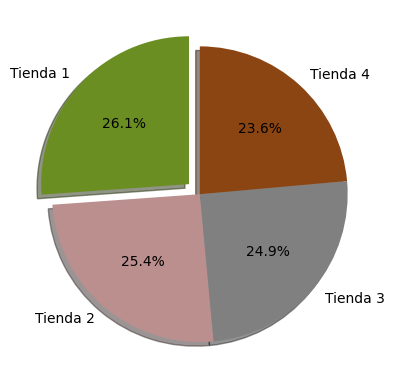

In [70]:
print(f'La tienda 1 tiene una facturación de: {facturacion_tienda:.2f}')
print(f'La tienda 2 tiene una facturación de: {facturacion_tienda2:.2f}')
print(f'La tienda 3 tiene una facturación de: {facturacion_tienda3:.2f}')
print(f'La tienda 4 tiene una facturación de: {facturacion_tienda4:.2f}')
print(f'La tienda con mayor facturación es {lista_tiendas[lista_facturacion.index(max(lista_facturacion))]} con una facturación de {max(lista_facturacion):.2f}')
print(f'La tienda con menor facturación es {lista_tiendas[lista_facturacion.index(min(lista_facturacion))]} con una facturación de {min(lista_facturacion):.2f}')

labels = 'Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'
sizes = [facturacion_tienda, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]
explode = (0.1, 0, 0, 0)  #Extruye la 1 pieza

fig, ax = plt.subplots()
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
       colors=['olivedrab', 'rosybrown', 'gray', 'saddlebrown'], shadow = True, startangle = 90)
plt.show()

# 2. Ventas por categoría

In [60]:
def ventas_por_categoria(tienda: pd.DataFrame) -> pd.Series:
  """Función para calcular la cantidad de ventas por categoría de una tienda.

  Args:
      tienda (pd.DataFrame): DataFrame con los datos de la tienda.

  Returns:
      pd.Series: Series con la cantidad de ventas por categoría.
  """
  return tienda.groupby("Categoría del Producto")["Categoría del Producto"].count()

cantidad_categoria_tienda = ventas_por_categoria(tienda)
cantidad_categoria_tienda2 = ventas_por_categoria(tienda2)
cantidad_categoria_tienda3 = ventas_por_categoria(tienda3)
cantidad_categoria_tienda4 = ventas_por_categoria(tienda4)

print(f'La categoría más popular en la tienda 1 es: {cantidad_categoria_tienda.idxmax()}, con un total de: {max(cantidad_categoria_tienda)} ventas.')
print(f'La categoría más popular en la tienda 2 es: {cantidad_categoria_tienda2.idxmax()}, con un total de: {max(cantidad_categoria_tienda2)} ventas.')
print(f'La categoría más popular en la tienda 3 es: {cantidad_categoria_tienda3.idxmax()}, con un total de: {max(cantidad_categoria_tienda3)} ventas.')
print(f'La categoría más popular en la tienda 4 es: {cantidad_categoria_tienda4.idxmax()}, con un total de: {max(cantidad_categoria_tienda4)} ventas.')

print(f'La categoría menos popular en la tienda 1 es: {cantidad_categoria_tienda.idxmin()}, con un total de: {min(cantidad_categoria_tienda)} ventas.')
print(f'La categoría menos popular en la tienda 2 es: {cantidad_categoria_tienda2.idxmin()}, con un total de: {min(cantidad_categoria_tienda2)} ventas.')
print(f'La categoría menos popular en la tienda 3 es: {cantidad_categoria_tienda3.idxmin()}, con un total de: {min(cantidad_categoria_tienda3)} ventas.')
print(f'La categoría menos popular en la tienda 4 es: {cantidad_categoria_tienda4.idxmin()}, con un total de: {min(cantidad_categoria_tienda4)} ventas.')

La categoría más popular en la tienda 1 es: Muebles, con un total de: 465 ventas.
La categoría más popular en la tienda 2 es: Muebles, con un total de: 442 ventas.
La categoría más popular en la tienda 3 es: Muebles, con un total de: 499 ventas.
La categoría más popular en la tienda 4 es: Muebles, con un total de: 480 ventas.
La categoría menos popular en la tienda 1 es: Artículos para el hogar, con un total de: 171 ventas.
La categoría menos popular en la tienda 2 es: Artículos para el hogar, con un total de: 181 ventas.
La categoría menos popular en la tienda 3 es: Artículos para el hogar, con un total de: 177 ventas.
La categoría menos popular en la tienda 4 es: Instrumentos musicales, con un total de: 170 ventas.


<ipython-input-83-57aac53a40df>:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


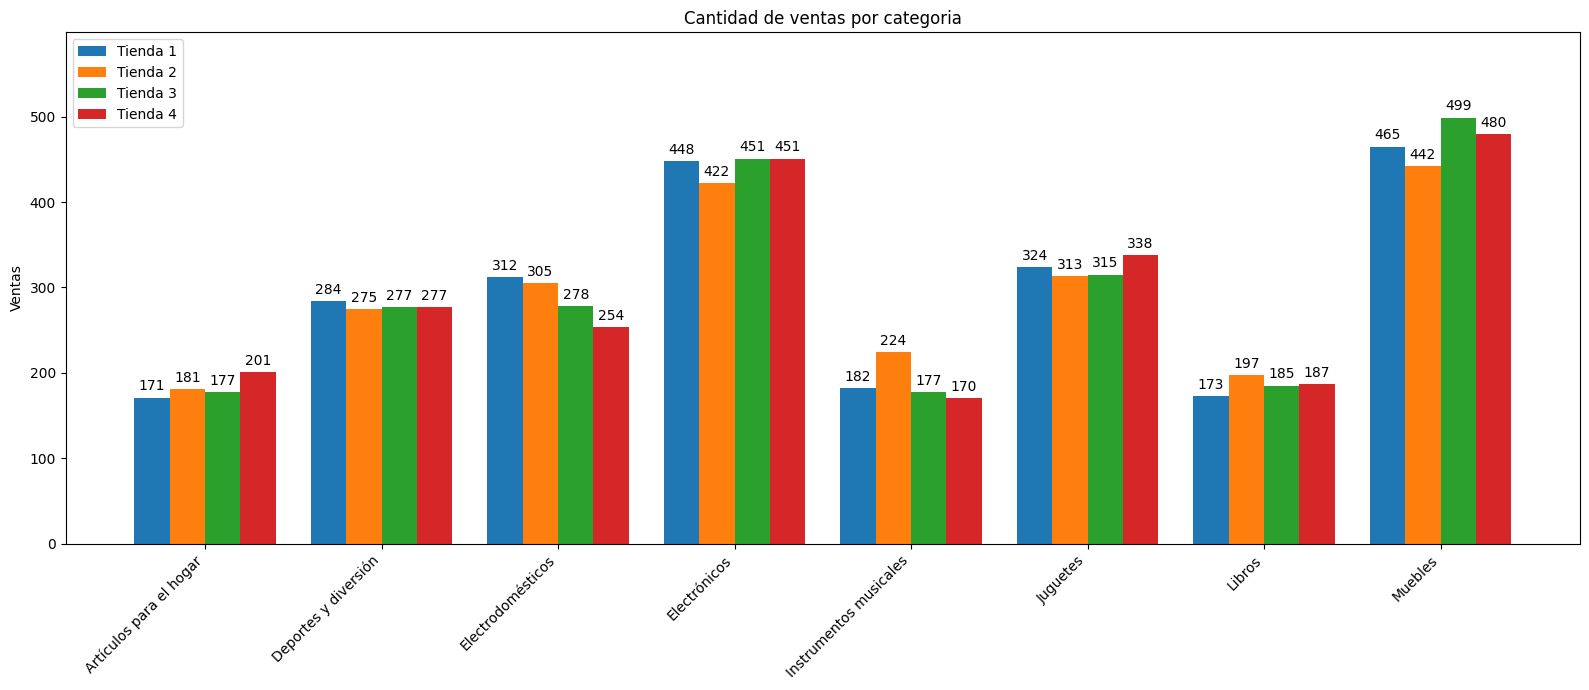

In [83]:
def graficar_categorias(tiendas: list[pd.DataFrame], nombre_tiendas: list[str]) -> None:
  """Función para gráficar la cantidad de articulos vendidos por categoría en cada tienda

  Args:
      tiendas (pd.DataFrame): DataFrame con los datos de las ventas por categoría de la tienda.
      nombres_tiendas (list[str]): Lista con los nombres de las tiendas.
  """
  categorias = tiendas[0].index
  x = np.arange(len(categorias)) #Ubicación de etiquetas
  width = 0.8 / len(tiendas) # Ancho de las barras

  fig, ax = plt.subplots(figsize = (16, 7), layout='constrained')

  for i, (tienda, nombre) in enumerate(zip(tiendas, nombre_tiendas)):
    offset = (i - (len(tiendas) -1 ) / 2) * width #Centrado de las barras
    ventas = tienda.values
    rects = ax.bar(x + offset, ventas, width, label=nombre)
    ax.bar_label(rects, padding=3)

  ax.set_ylabel('Ventas')
  ax.set_title('Cantidad de ventas por categoria')
  ax.set_xticks(x)
  ax.set_xticklabels(categorias, rotation = 45, ha = 'right', fontsize = 10)
  ax.legend(loc='upper left', fontsize = 10)
  ax.set_ylim(0, max([s.max() for s in tiendas]) * 1.2)

  plt.tight_layout()
  plt.show()

graficar_categorias([cantidad_categoria_tienda, cantidad_categoria_tienda2, cantidad_categoria_tienda3, cantidad_categoria_tienda4], lista_tiendas)

# 3. Calificación promedio de la tienda


In [85]:
media_satisfaccion = tienda["Calificación"].mean()
media_satisfaccion2 = tienda2["Calificación"].mean()
media_satisfaccion3 = tienda3["Calificación"].mean()
media_satisfaccion4 = tienda4["Calificación"].mean()
lista_media_satisfaccion = [media_satisfaccion, media_satisfaccion2, media_satisfaccion3, media_satisfaccion4]

print(f'La calificación promedio de la tienda 1 es: {media_satisfaccion:.2f}')
print(f'La calificación promedio de la tienda 2 es: {media_satisfaccion2:.2f}')
print(f'La calificación promedio de la tienda 3 es: {media_satisfaccion3:.2f}')
print(f'La calificación promedio de la tienda 4 es: {media_satisfaccion4:.2f}')

La calificación promedio de la tienda 1 es: 3.98
La calificación promedio de la tienda 2 es: 4.04
La calificación promedio de la tienda 3 es: 4.05
La calificación promedio de la tienda 4 es: 4.00


list

In [63]:
tienda_menor_satisfaccion = lista_tiendas[lista_media_satisfaccion.index(min(lista_media_satisfaccion))]
tienda_mayor_satisfaccion = lista_tiendas[lista_media_satisfaccion.index(max(lista_media_satisfaccion))]
print(f'La tienda con mejor satisfacción es {tienda_mayor_satisfaccion} con una calificación de {max(lista_media_satisfaccion):.2f}')
print(f'La tienda con peor satisfacción es {tienda_menor_satisfaccion} con una calificación de {min(lista_media_satisfaccion):.2f}')

La tienda con mejor satisfacción es Tienda 3 con una calificación de 4.05
La tienda con peor satisfacción es Tienda 1 con una calificación de 3.98


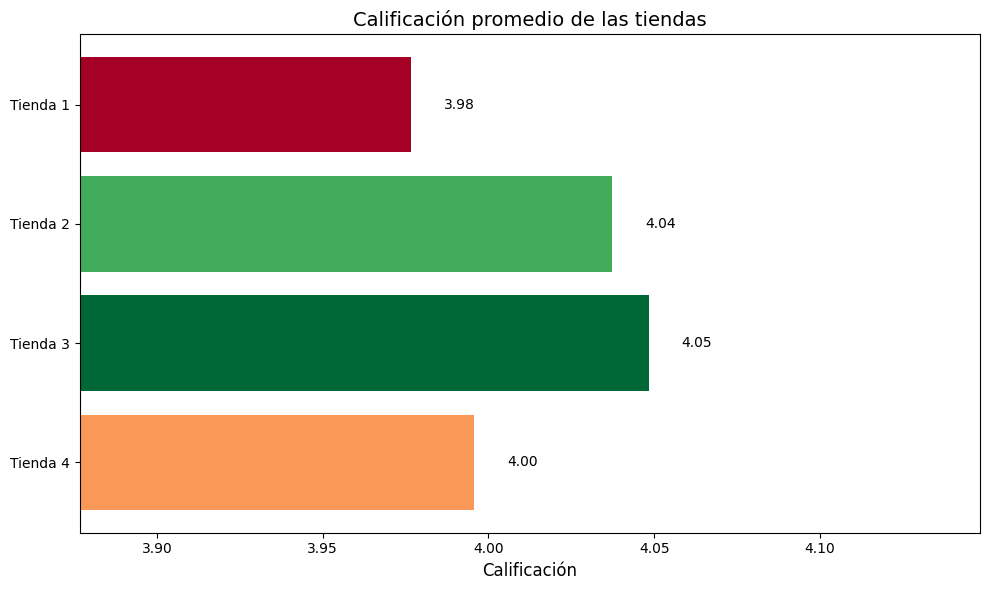

In [92]:
def graficar_calificacion(calificacion_lista: list[float], nombre_tiendas: list[str]) -> None:
  """Función para gráficar la calificación promedio de cada tienda

  Args:
      tiendas (list[float]): Lista con la media de calificación de cada tienda.
      nombres_tiendas (list[str]): Lista con los nombres de las tiendas.
  """
  fig, ax = plt.subplots(figsize = (10, 6))

  y_pos = np.arange(len(nombre_tiendas))

  norm = mcolors.Normalize(vmin = min(calificacion_lista), vmax = max(calificacion_lista))
  cmap = plt.colormaps.get_cmap('RdYlGn') # Paleta de colores tipo ranking
  colores = [cmap(norm(valor)) for valor in calificacion_lista]

  barras = ax.barh(y_pos, calificacion_lista, align='center', color = colores)
  ax.set_yticks(y_pos, labels = nombre_tiendas)
  ax.invert_yaxis() #Las etiquetas se leen de arriba hacia abajo
  ax.set_xlabel('Calificación', fontsize = 12)
  ax.set_title('Calificación promedio de las tiendas', fontsize = 14)

  for i, barra in enumerate(barras):
    ax.text(barra.get_width() + 0.01, barra.get_y() + barra.get_height()/2,
            f'{calificacion_lista[i]:.2f}',
            va = 'center', fontsize = 10)

  ax.set_xlim(min(calificacion_lista) - 0.1, max(calificacion_lista) + 0.1)


  plt.tight_layout()
  plt.show()

graficar_calificacion(lista_media_satisfaccion, lista_tiendas)


# 4. Productos más y menos vendidos

In [64]:
productos =  tienda.groupby("Producto")["Producto"].count().sort_values(ascending=False)
productos2 =  tienda2.groupby("Producto")["Producto"].count().sort_values(ascending=False)
productos3 =  tienda3.groupby("Producto")["Producto"].count().sort_values(ascending=False)
productos4 =  tienda4.groupby("Producto")["Producto"].count().sort_values(ascending=False)
max_ventas = productos.max()
max_ventas2 = productos2.max()
max_ventas3 = productos3.max()
max_ventas4 = productos4.max()
productos_mas_vendidos = productos[productos == max_ventas]
productos_mas_vendidos2 = productos2[productos2 == max_ventas2]
productos_mas_vendidos3 = productos3[productos3 == max_ventas3]
productos_mas_vendidos4 = productos4[productos4 == max_ventas4]
min_ventas = productos.min()
min_ventas2 = productos2.min()
min_ventas3 = productos3.min()
min_ventas4 = productos4.min()
productos_menos_vendidos = productos[productos == min_ventas]
productos_menos_vendidos2 = productos2[productos2 == min_ventas2]
productos_menos_vendidos3 = productos3[productos3 == min_ventas3]
productos_menos_vendidos4 = productos4[productos4 == min_ventas4]

print(f'Los producto más vendido en la tienda 1 es: {productos_mas_vendidos}')
print(f'Los productos menos vendido en la tienda 1 es: {productos_menos_vendidos}')
print(f'El producto más vendido en la tienda 2 es: {productos_mas_vendidos2}')
print(f'El producto menos vendido en la tienda 2 es: {productos_menos_vendidos2}')
print(f'El producto más vendido en la tienda 3 es: {productos_mas_vendidos3}')
print(f'El producto menos vendido en la tienda 3 es: {productos_menos_vendidos3}')
print(f'El producto más vendido en la tienda 4 es: {productos_mas_vendidos4}')
print(f'El producto menos vendido en la tienda 4 es: {productos_menos_vendidos4}')

Los producto más vendido en la tienda 1 es: Producto
Armario          60
TV LED UHD 4K    60
Microondas       60
Name: Producto, dtype: int64
Los productos menos vendido en la tienda 1 es: Producto
Celular ABXY                 33
Auriculares con micrófono    33
Name: Producto, dtype: int64
El producto más vendido en la tienda 2 es: Producto
Iniciando en programación    65
Name: Producto, dtype: int64
El producto menos vendido en la tienda 2 es: Producto
Juego de mesa    32
Name: Producto, dtype: int64
El producto más vendido en la tienda 3 es: Producto
Kit de bancas    57
Name: Producto, dtype: int64
El producto menos vendido en la tienda 3 es: Producto
Bloques de construcción    35
Name: Producto, dtype: int64
El producto más vendido en la tienda 4 es: Producto
Cama box    62
Name: Producto, dtype: int64
El producto menos vendido en la tienda 4 es: Producto
Guitarra eléctrica    33
Name: Producto, dtype: int64


# 5. Envío promedio por tienda

In [93]:
def calcular_envio_promedio(tienda: pd.DataFrame) -> float:
  """ Función para calcular el costo promedio de envío por tienda
  Args:
      tienda (pd.DataFrame): DataFrame con los datos de la tienda.

  Returns:
      float: Costo promedio de envío por tienda.
  """
  return tienda["Costo de envío"].mean()

promedio_envio_tienda = calcular_envio_promedio(tienda)
promedio_envio_tienda2 = calcular_envio_promedio(tienda2)
promedio_envio_tienda3 = calcular_envio_promedio(tienda3)
promedio_envio_tienda4 = calcular_envio_promedio(tienda4)

print(f'El costo promedio de envío en la tienda 1 es: {promedio_envio_tienda:.2f}')
print(f'El costo promedio de envío en la tienda 2 es: {promedio_envio_tienda2:.2f}')
print(f'El costo promedio de envío en la tienda 3 es: {promedio_envio_tienda3:.2f}')
print(f'El costo promedio de envío en la tienda 4 es: {promedio_envio_tienda4:.2f}')

El costo promedio de envío en la tienda 1 es: 26018.61
El costo promedio de envío en la tienda 2 es: 25216.24
El costo promedio de envío en la tienda 3 es: 24805.68
El costo promedio de envío en la tienda 4 es: 23459.46


# <font color = cyan>INFORME FINAL DE ANÁLISIS DE DATOS SOBRE LAS TIENDAS

---




##<font color = green> 1. Introducción

---

El presente informe está estructurado con la función de ayudar a tomar la decisión de vender una de las tiendas, basado en los datos recibidos. Inicialmente fueron extraídos los datos recibidos, para filtrarlos y analizarlos. El informe se desarrolló haciendo uso de un orden específico con la intención de mantener una estructura clara que facilite su legibilidad. Inicialmente se hizo un análisis de la facturación individual de cada tienda, para así encontrar la tienda que más había facturado en el periodo. Luego se tomaron en cuenta otras métricas como la calificación recibida en cada tienda, las categorías más populares por tienda y el costo promedio del envío. Para llegar a una conclusión, basada en el análisis de los datos, en la cual se sugiere una tienda a vender.

## <font color = green> 2. Presentación de los datos

---

### <font color=brown> 2.1. Facturación total por tiendas

---


Esta sección está dedicada al análisis de la facturación total por tiendas. Inicialmente se extrajeron los datos de facturación de las tiendas, filtrando los valores recibidos por cada uno de los productos vendidos por tienda, y haciendo la suma, haciendo uso del metodo sum(). Los resultados del total de ventas por tienda se presenta a continuación:


*   Tienda 1: 1.150'880.400,00
*   Tienda 2: 1.116'343.500,00
*   Tienda 3: 1.098'019.600,00
*   Tienda 4: 1.038'375.700,00

La tienda con una mayor facturación fue la tienda 1, y la tienda con menor facturación fue la tienda 4.


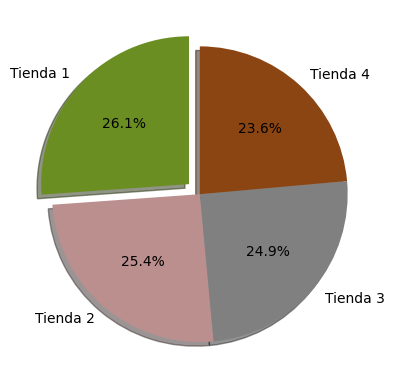

###<font color = brwon> 2.2 Categorías de productos más y menos vendidas

---


Esta sección tiene como objetivo encontrar las categorías más populares dentro de cada una de las tiendas del Sr. Juan, para complementar una visión para horizontal sobre los parametros a tener en cuenta a la hora de tomar una decisión.

1. Tienda 1
  *   La categoría más popular es:
    - Muebles, con un total de 465 ventas.
  * La categoría menos popular es:
    - Artículos para el hogar, con un total de 171 ventas.
2. Tienda 2
  *   La categoría más popular es:
    - Muebles, con un total de 442 ventas.
  * La categoría menos popular es:
    - Artículos para el hogar, con un total de 181 ventas.
3. Tienda 3
  *   La categoría más popular es:
    - Muebles, con un total de 499 ventas.
  *   La categoría menos popular es:
    - Artículos para el hogar, con un total de 177 ventas.
4. Tienda 4
  *   La categoría más popular es:
    - Muebles, con un total de 480 ventas
  * La categoría menos popular es:
    - Instrumentos musicales, con un total de 170 ventas.

Este análisis muestra que la categoría más popular en todas las tiendas es *'Muebles'* en donde la tienda 3 destaca con un total de 499 ventas. Mientras que la categoría menos popular en la mayoría de las tiendas es *'Artículos para el hogar'* en donde la tienda con menores ventas en las tienda 1 con 171 ventas. Adicionalmente se observa como en la tienda 4 la categoría menos popular es *'Instrumentos musicales'* con un total de 170 ventas.

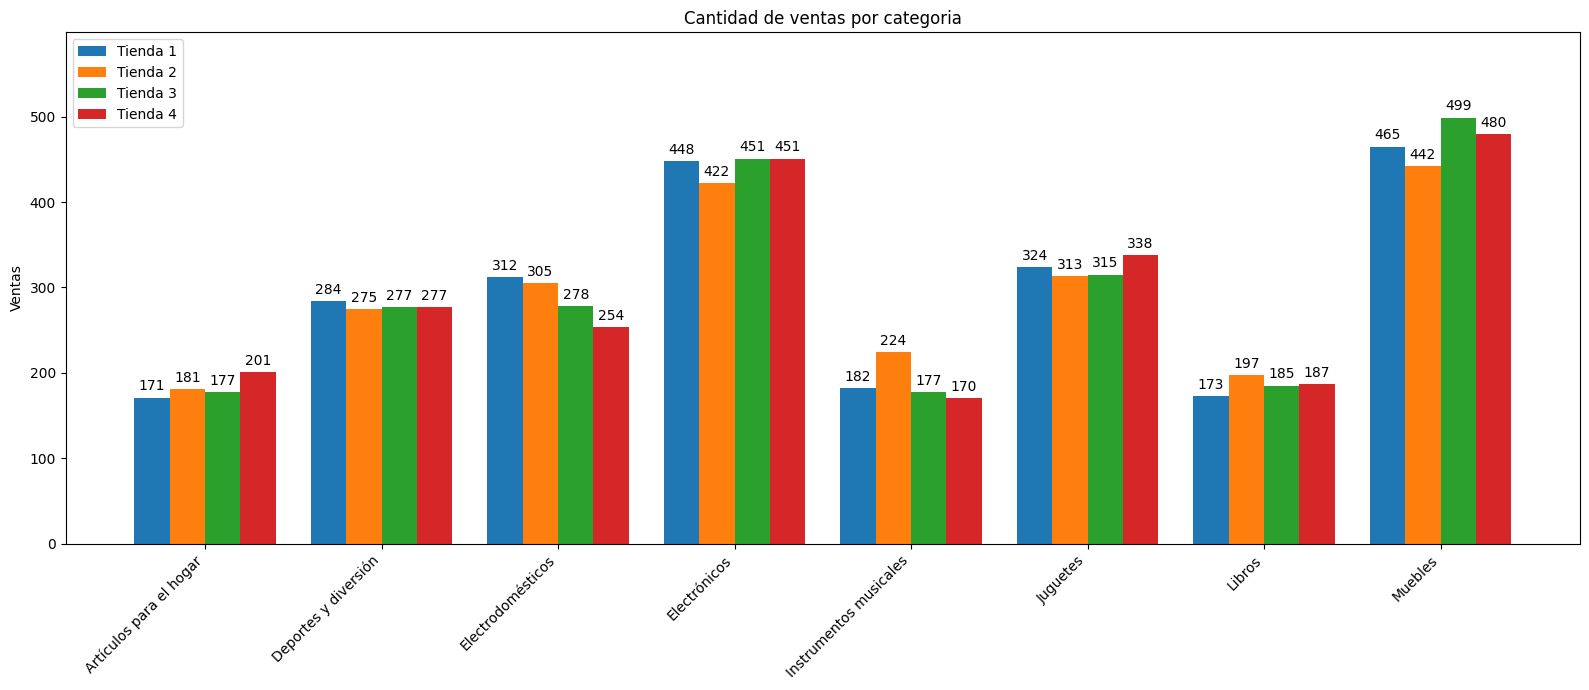

###<font color = brown>2.3 Calificaciones promedio por tienda

---


Esta sección analizó la totalidad de las calificaciones dadas por los clientes, calculando un promedio por tienda para encontrar cual es la tienda mejor percibida por los clientes.
*   La calificación promedio de la tienda 1 es: 3.98
*   La calificación promedio de la tienda 2 es: 4.04
*   La calificación promedio de la tienda 3 es: 4.05
*   La calificación promedio de la tienda 4 es: 4.00

Esta información muestra que la tienda mejor calificada es la tienda 3 con una calificación promedio de 4.05. La tienda peor calificada es la tienda 1 con una calificación promedio de 3.98.



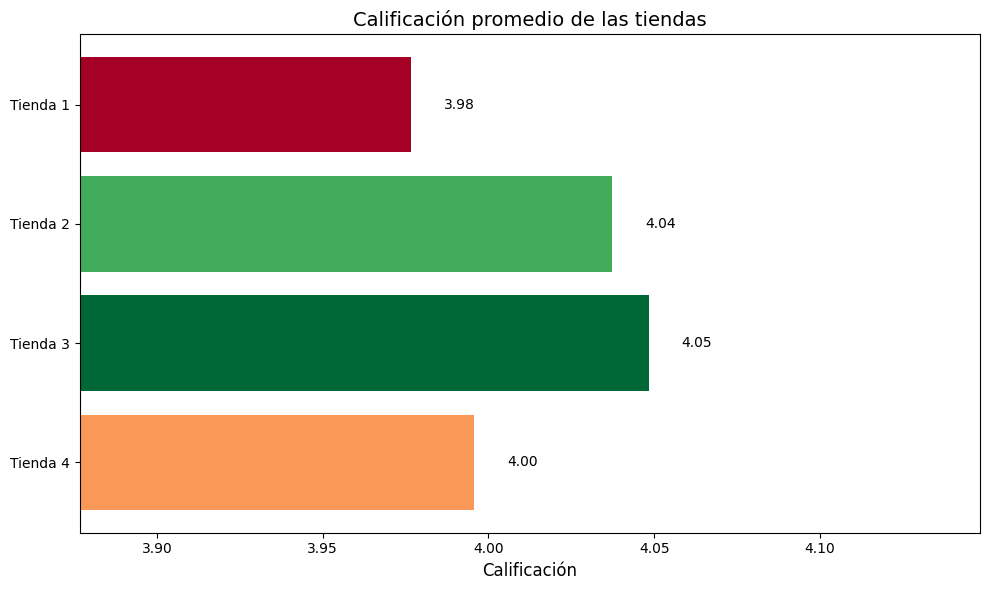

### <font color = brown>2.4 Productos más y menos vendidos por tienda

---


Esta sección está enfocada en el análisis de las ventas por producto en cada una de las tiendas, para encontrar el producto individual más vendido en cada tienda, y también el menos vendido.

1. Más vendidos:
  *   Tienda 1: Los artículos más vendidos son:
    - Armario con un total de 60 ventas.
    - TV LED UHD 4K con un total de 60 ventas.
    - Microondas con un total de 60 ventas.
  *   Tienda 2: El artículo más vendido es:
    - Iniciando en programación con un total de 65 ventas.
  *   Tienda 3: El artículo más vendido es:
    - Kit de bancas con un total de 57 ventas.
  *   Tienda 4: El artículo más vendido es:
    - Cama box con un total de 62 ventas.
2. Menos vendidos:
  *   Tienda 1: Los artículos menos vendidos son:
    - Celular ABXY con un total de 33 ventas.
    - Auriculares con micrófono con un total de 33 ventas.
  *   Tienda 2: El artículo menos vendido es:
    - Juego de mesa con un total de 32 ventas.
  *   Tienda 3: El artículo menos vendido es:
    - Bloques de construcción con un total de 35 ventas.
  *   Tienda 4: El artículo menos vendido es:
    - Guitarra eléctrica con un total de 33 ventas.


### <font color = brown> 2.5 Costo de envío promedio por tienda

---

El costo promedio de envío por tienda es un análisis relevante ya que permite entender la optimización de la gestión de envios por tienda.

*   El costo promedio de envío en la tienda 1 es: 26.018,61
*   El costo promedio de envío en la tienda 2 es: 25.216,24
*   El costo promedio de envío en la tienda 3 es: 24.805,68
*   El costo promedio de envío en la tienda 4 es: 23.459,46

La tienda con mayor costo promedio por envío es la tienda 1, y la tienda con menor costo promedio por envío es la tienda 4.



##  <font color = green> 3. Conclusión
---


La presente sección está pensada para dar un análisis más general sobre los datos recibidos, ya que el análisis individual por cada métrica ha sido cubierto en su respectiva sección. Adicionalmente se busca dar una opinión basada en los datos sobre la tienda que el Sr. Juan debería vender.

Los datos sobre las tiendas son muy parecidos entre todos, y teniendo en cuenta la paridad en datos como la calificación media por tienda y en las categorías más populares por tienda, baso mi opinión explícitamente en la facturación por tienda, ya que es donde las tiendas tienen una mayor diferencia.

Según los datos y las gráficas presentadas en la Sección 2, la tienda con un valor de ventas *(Facturación)* es la **Tienda 4**.

Por lo tanto recomiendo vender la **Tienda 4** ya que es la tienda con una facturación menor, y la segunda tienda con menor calificación por parte de los clientes. Adicionalmente sería bueno replicar el modelo de optimización de costo de los envíos, ya que es la tienda con el menor costo promedio por envío, lo que hace que su modelo de envíos sea muy atractivo para el negocio de las otras tiendas.